In [25]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings("ignore")

In [26]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')

In [27]:
train_df.shape, test_df.shape

((8000, 21), (3799, 20))

In [28]:
train_df.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [29]:
train_df.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,62.777875,18.576663,7.267087,2.807037,6.231213,44.608900,0.264525,0.816563,19.583700,...,1.947787,71.365825,1.077838,2.168500,3.245300,1.624513,0.648688,0.245212,1.257762,0.833625
std,3977.447579,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [30]:
train_df.isnull().any()

Id             False
GP             False
MIN            False
PTS            False
FGM            False
FGA            False
FG%            False
3P Made        False
3PA            False
3P%            False
FTM            False
FTA            False
FT%            False
OREB           False
DREB           False
REB            False
AST            False
STL            False
BLK            False
TOV            False
TARGET_5Yrs    False
dtype: bool

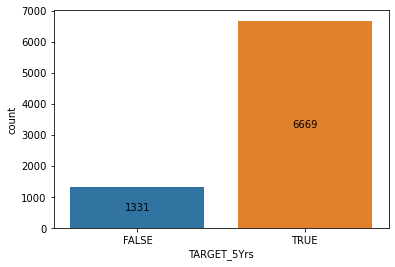

83.3625% target values with 1 (TRUE)


In [31]:
# visualizing the target variable shows a slight class imbalance

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt

g = sns.countplot(train_df['TARGET_5Yrs'])
g.set_xticklabels(['FALSE','TRUE'])
g.bar_label(g.containers[0], label_type='center')
plt.show()
print('{}% target values with 1 (TRUE)'.format(100 * train_df['TARGET_5Yrs'].value_counts()[1]/train_df.shape[0]))

#### Univariate Analysis

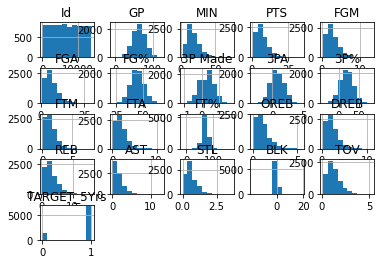

In [32]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
train_df.hist()
pyplot.show()

Multivariate Analysis

In [33]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,5,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(4,5,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

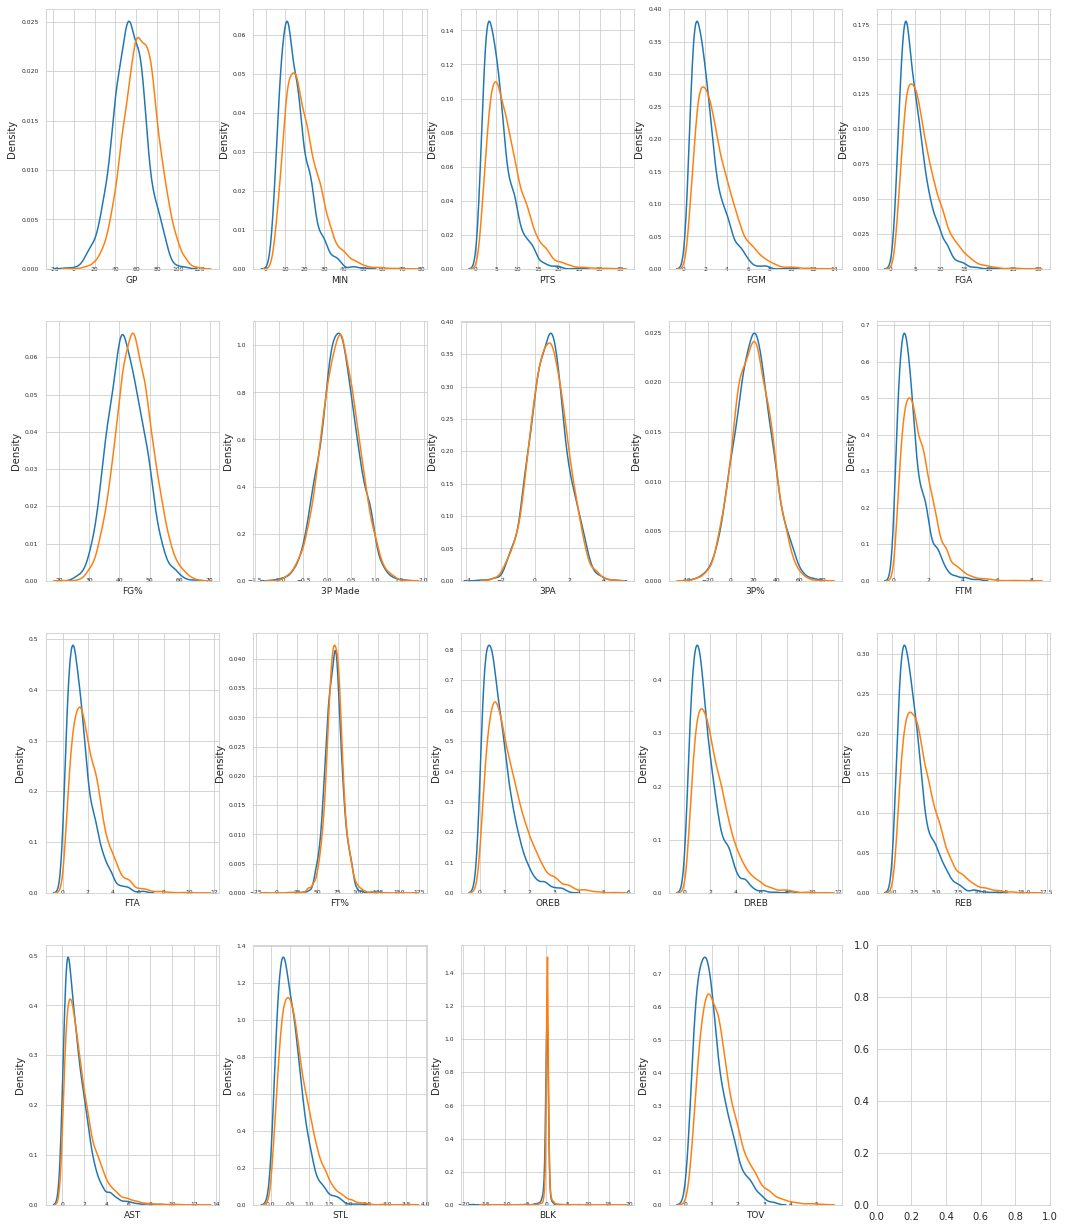

In [34]:
t0 = train_df.loc[train_df['TARGET_5Yrs'] == 0]
t1 = train_df.loc[train_df['TARGET_5Yrs'] == 1]
features = train_df.columns.values[1:20]
plot_feature_distribution(t0, t1, '0', '1', features)

#### Data Pre-processing

In [35]:
train_df_clean = train_df.copy()

In [36]:
train_df_clean.drop_duplicates(inplace= True)
train_df_clean.drop('Id', axis=1, inplace=True)
train_df_clean.columns = train_df_clean.columns.str.strip()
target = train_df_clean.pop('TARGET_5Yrs')

In [37]:
train_df_clean.shape, train_df.shape

((8000, 19), (8000, 21))

In [38]:
train_df_clean.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6
1,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4
2,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6
3,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9
4,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7


In [39]:
test_df_clean = test_df.copy()
Id = test_df_clean.pop('Id')

In [40]:
test_df_clean.drop_duplicates(inplace= True)
#test_df_clean.drop('Id', axis=1, inplace=True)
test_df_clean.columns = test_df_clean.columns.str.strip()

In [41]:
test_df_clean.shape, test_df.shape

((3799, 19), (3799, 20))

In [42]:
test_df_clean.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,-0.0,1.8
2,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


#### Data Normalisation

In [43]:
# fit transform Standard Scaler on train data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df_clean.values[:] = scaler.fit_transform(train_df_clean)
test_df_clean.values[:] = scaler.transform(test_df_clean)

In [44]:
train_df_clean.shape, test_df_clean.shape

((8000, 19), (3799, 19))

In [45]:
# save scaler
from joblib import dump
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']

#### Feature Selection

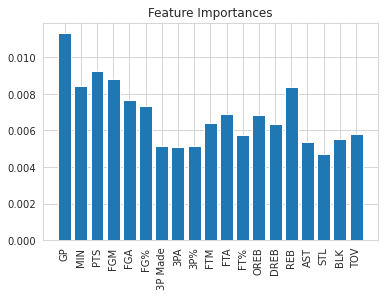

In [46]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

model = ExtraTreesClassifier()
model.fit(train_df_clean,target) 

importances = pd.Series(model.feature_importances_, index=train_df_clean.columns) 

# Normalizing the individual importances
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0)
indicies = np.argsort(importances)[::-1]

plt.bar(train_df_clean.columns, std)
plt.title('Feature Importances')
plt.xticks(range(train_df_clean.shape[1]), rotation=90)
plt.show()


(-1.0, 19.0)

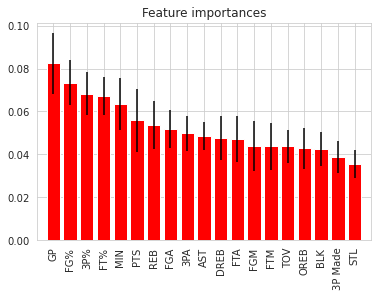

In [47]:
model = RandomForestClassifier()
model.fit(train_df_clean, target)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

plt.figure()
plt.title('Feature importances')
plt.bar(range(train_df_clean.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_df_clean.shape[1]), train_df_clean.columns[indices], rotation=90)
plt.xlim([-1, train_df_clean.shape[1]])

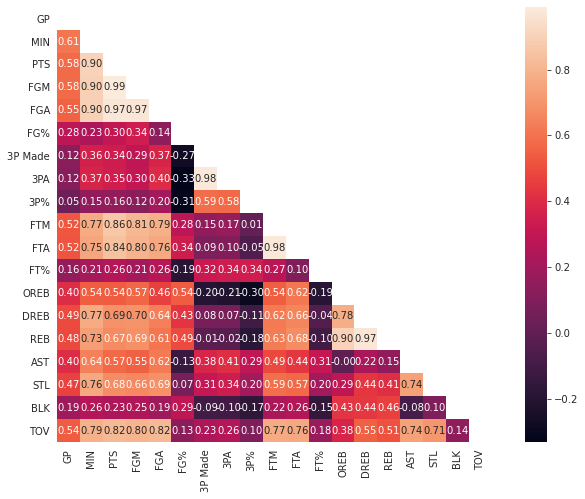

In [48]:
corr_matrix = train_df_clean.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12,8))
a = sns.heatmap(corr_matrix, mask=mask, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)           
plt.show()    

In [49]:
 # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
type(upper)

pandas.core.frame.DataFrame

In [50]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

['PTS', 'FGM', 'FGA', '3PA', 'FTA', 'REB']


In [51]:
# Drop Marked Features
train_df_clean.drop(to_drop, axis=1, inplace=True)
print(train_df_clean)

In [53]:
%load_ext autoreload
%autoreload 2

In [54]:
from src.data.shannon_sets import save_sets

save_sets(X_train=train_df_clean, y_train=target, X_val=None, y_val=None, 
          X_test=test_df_clean, y_test=None, path='../data/processed/')

#### Create Baseline Model

In [55]:
# baseline model
from src.models.performance import print_reg_perf
y_mean = target.mean()
y_base = np.full((len(target), 1), y_mean)
print_reg_perf(y_preds=y_base, y_actuals=target, set_name='Training')

RMSE Training: 0.37241691606987987
MAE Training: 0.27738871875


In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [57]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, train_df_clean, target, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('%s AUC score: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR AUC score: 0.702119 (0.016482)
RF AUC score: 0.672659 (0.024430)
LDA AUC score: 0.701693 (0.018657)
KNN AUC score: 0.622822 (0.026976)
CART AUC score: 0.539862 (0.022133)
NB AUC score: 0.680213 (0.018520)
SVM AUC score: 0.576986 (0.029640)


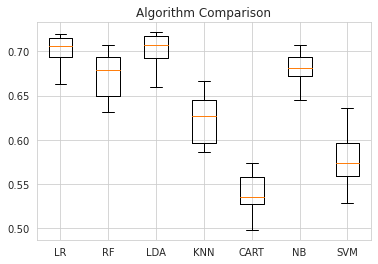

In [58]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [59]:
# Make predictions on train dataset
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(train_df_clean, target)
train_preds = model.predict_proba(train_df_clean)

#### Evaluate performance

In [60]:
print_reg_perf(y_preds=train_preds[:, 1], y_actuals=target, set_name='Training')

RMSE Training: 0.3571560910095179
MAE Training: 0.2551580069860332


#### Apply predictions

In [61]:
# Drop Marked Features
test_df_clean = test_df_clean.drop(['PTS', 'FGM', 'FGA', '3PA', 'FTA', 'REB'], axis=1)

In [62]:
#why does model.predict return 1s and 0s, but predict_proba returns probability????

test_preds = model.predict_proba(test_df_clean)

type(test_df_clean)

pandas.core.frame.DataFrame

In [63]:
# Can you evaluate performance on test?
#print_reg_perf(y_preds=test_preds[:, 1], y_actuals=target, set_name='Training')

In [65]:
output = pd.DataFrame({'Id': test_df.Id,
                       'TARGET_5Yrs': test_preds[:, 1]})
output.to_csv('../data/submissions/SM_submission_3.csv', index=False)